In [7]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

import numpy as np
import matplotlib as mpl

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

warnings.filterwarnings('ignore')

In [16]:
# Работаем с очищенными от выбросов данными
# stud_math = pd.read_csv('stud_math.csv') # оригинальный датафрейм
stud_math = pd.read_csv('stud_math_och.csv') # очищенный от выбросов и заполненными пропусками

In [17]:
stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,Priznak
0,GP,F,18,U,No data,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,No data,no,4.0,3.0,4.0,3.0,6.0,30.0,1
1,GP,F,17,U,GT3,No data,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0,1
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,No data,no,yes,yes,yes,No data,4.0,3.0,2.0,3.0,10.0,50.0,1
3,GP,F,15,U,GT3,T,4.0,2.0,health,No data,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0,1
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0,0
382,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,1.0,no,no,no,yes,yes,yes,No data,no,1.0,1.0,1.0,5.0,0.0,0.0,1
383,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0,0
384,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,No data,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0,1


# Корреляционный анализ данных

In [23]:
# составим список столбцов для отображения (кроме столбца признаков)
x_cols = [x for x in stud_math.columns if x != 'Priznak']
# составим списоки столбцов содержащих числовые и номинативные переменные
object_col = [x for x in stud_math.columns if stud_math[x].dtypes == 'object']
float_col = [x for x in stud_math.columns if stud_math[x].dtypes == 'float64'] # столбец age (int64) оставим за пределами списка


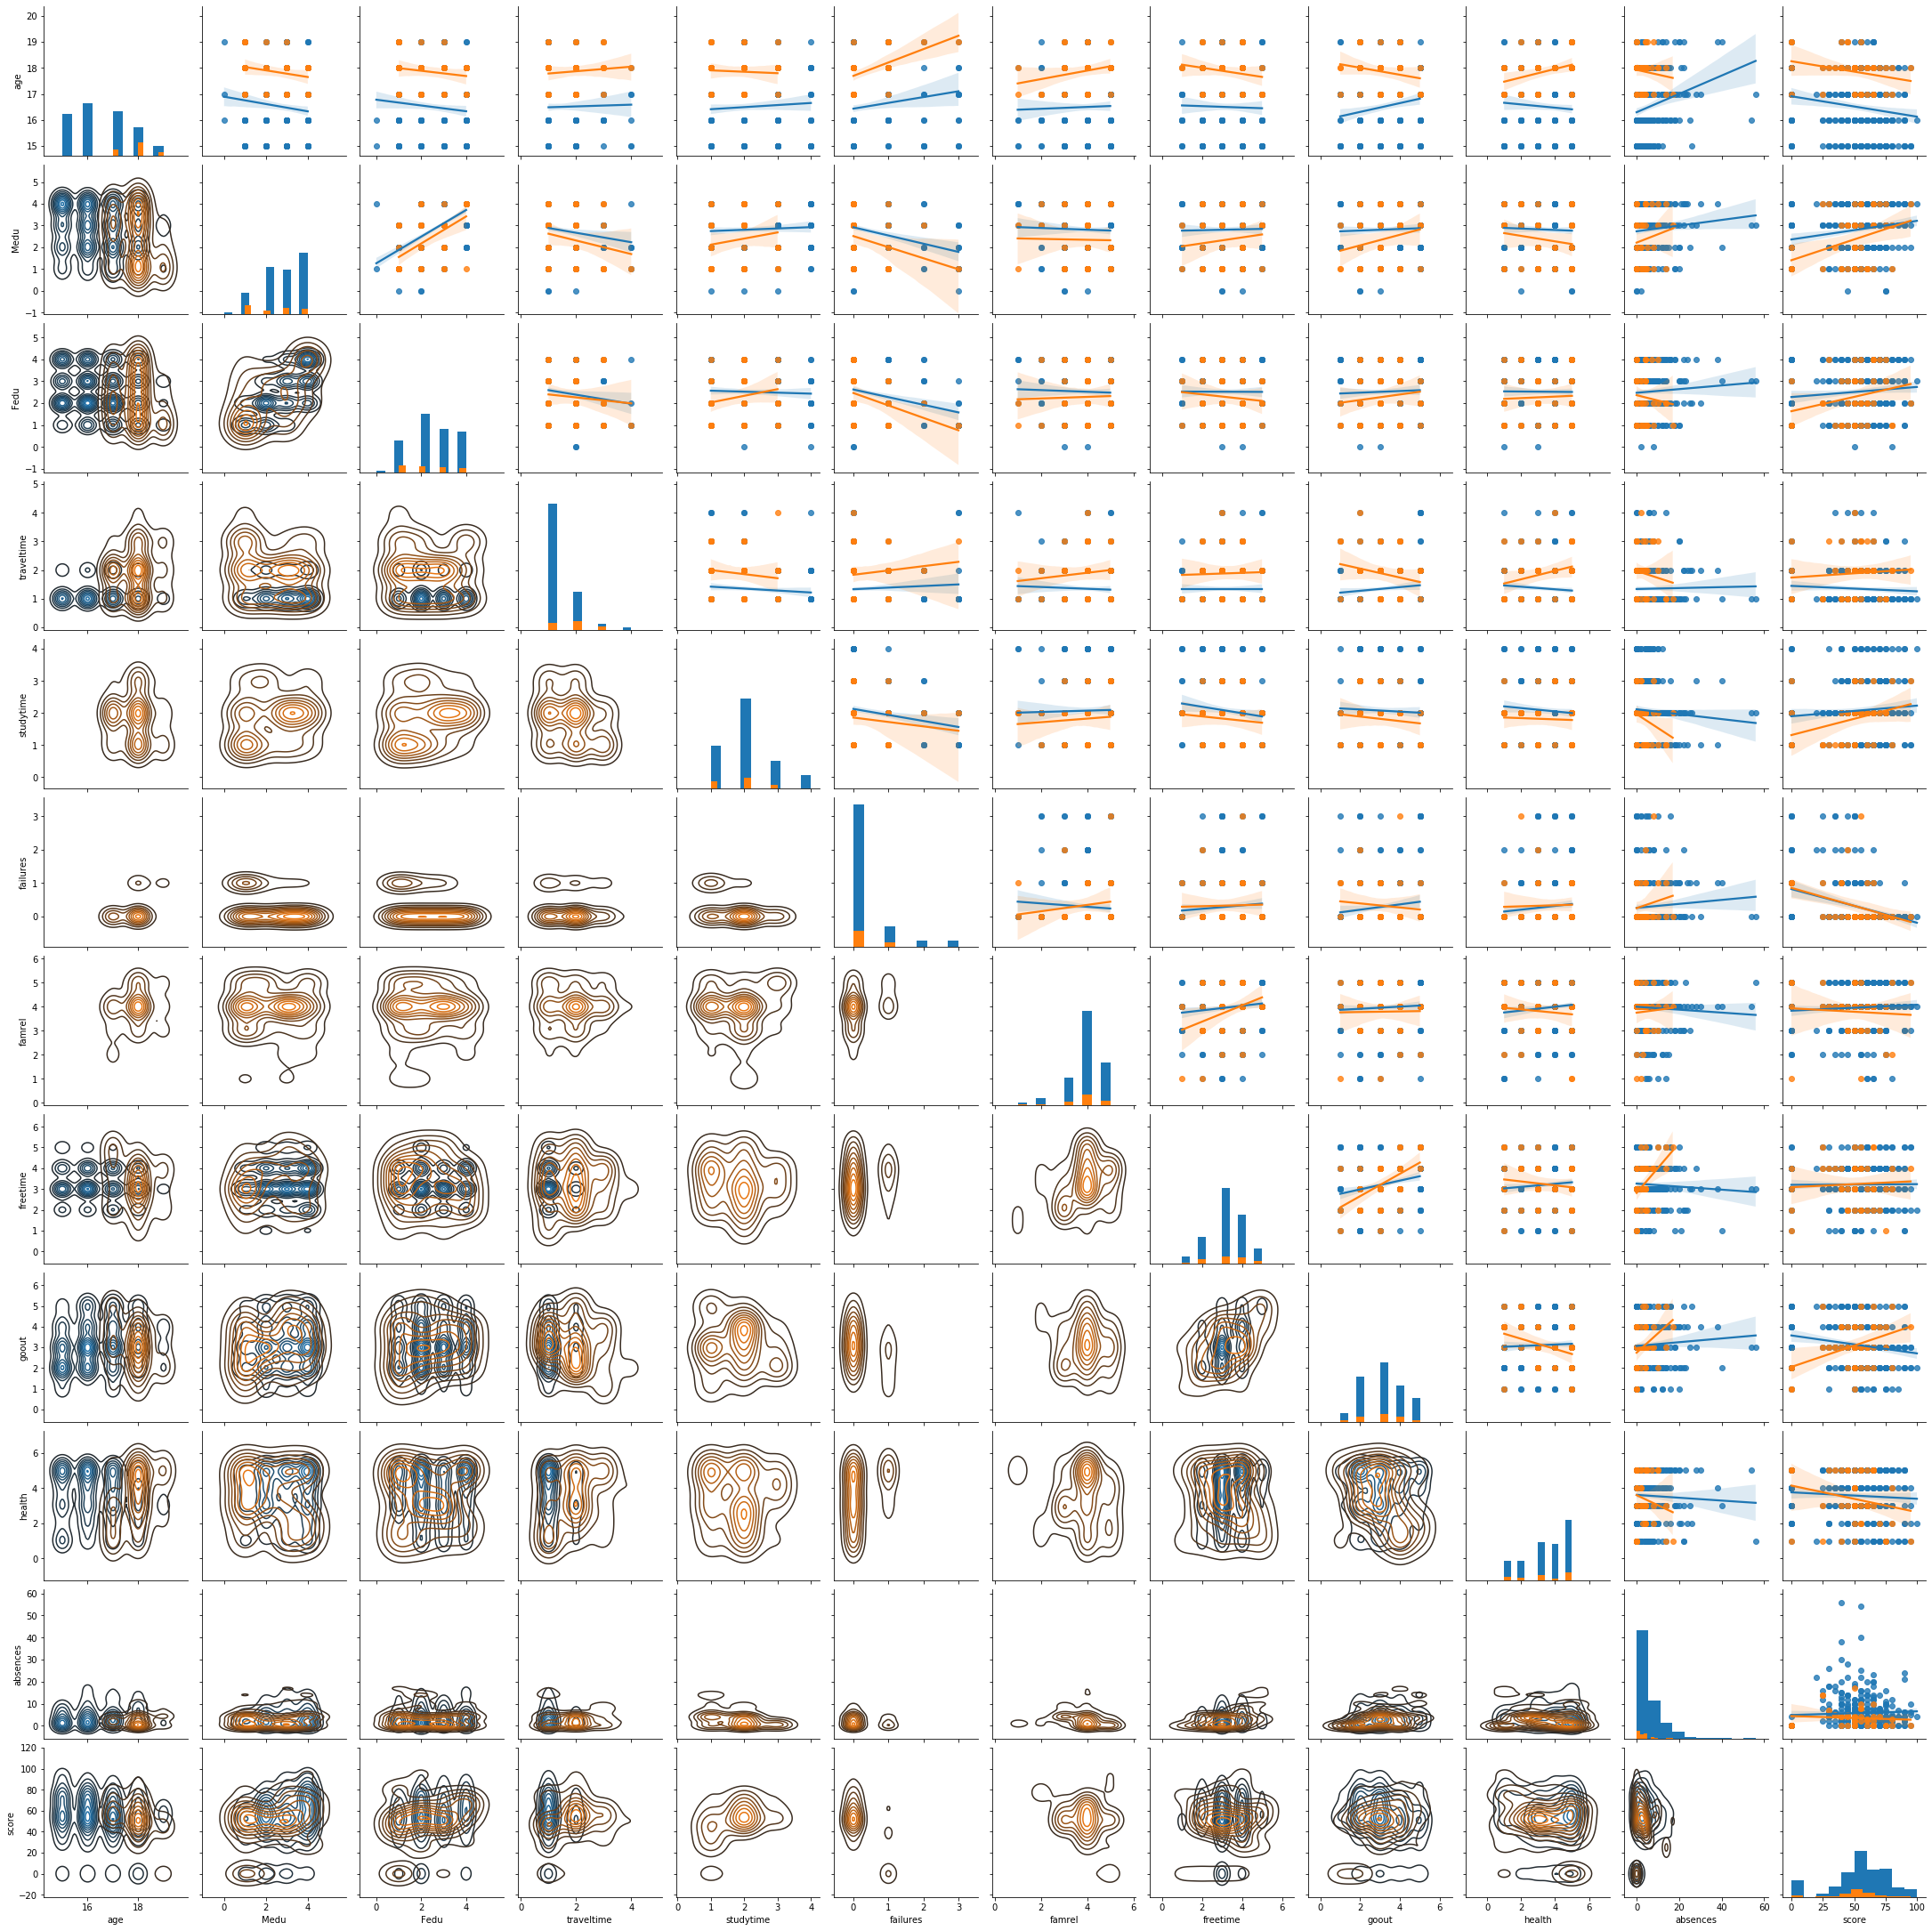

In [20]:
# в предоставленных данных представлены ученики двух школ, посмотрим на разбивку по школам.
g = sns.PairGrid(stud_math[x_cols], hue='school')
g.map_diag(plt.hist)
g.map_upper(sns.regplot)
g.map_lower(sns.kdeplot)

# Поиск корреляций с исследуемой величиной score

In [39]:
stud_math[x_cols].corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.172245,-0.122223,0.111257,0.012808,0.149560,0.015963,-0.029659,0.120758,-0.052213,0.161489,-0.164007
Medu,-0.172245,1.000000,0.601832,-0.167923,0.071088,-0.247858,-0.020214,0.030502,0.059384,-0.050157,0.103870,0.204184
Fedu,-0.122223,0.601832,1.000000,-0.135531,-0.007049,-0.241173,-0.017465,-0.015280,0.049339,0.001053,0.054515,0.118980
traveltime,0.111257,-0.167923,-0.135531,1.000000,-0.114293,0.069906,-0.031622,0.005650,0.063079,-0.049638,-0.017328,-0.058571
studytime,0.012808,0.071088,-0.007049,-0.114293,1.000000,-0.152993,0.032682,-0.111759,-0.047959,-0.075355,-0.067373,0.112310
failures,0.149560,-0.247858,-0.241173,0.069906,-0.152993,1.000000,-0.037376,0.065565,0.102489,0.100164,0.065856,-0.334199
famrel,0.015963,-0.020214,-0.017465,-0.031622,0.032682,-0.037376,1.000000,0.144148,0.053992,0.099619,-0.038963,0.055127
freetime,-0.029659,0.030502,-0.015280,0.005650,-0.111759,0.065565,0.144148,1.000000,0.279285,0.073310,-0.018132,0.013418
goout,0.120758,0.059384,0.049339,0.063079,-0.047959,0.102489,0.053992,0.279285,1.000000,-0.000089,0.080955,-0.120403
health,-0.052213,-0.050157,0.001053,-0.049638,-0.075355,0.100164,0.099619,0.073310,-0.000089,1.000000,-0.047746,-0.077234


Переменные Medu и Fedu коррелируют почти на 60%, одну переменную можно исключить (исключим Fedu - больше пропусков).
Остануться слабокоррелированные с отметками столбцы: age Medu traveltime studytime failures famrel freetime goout health absences
failures обратно коррелирует с оценками (-33%), что вполне логично, внеучебные неудачи плохо отражаются на общей успеваемости.

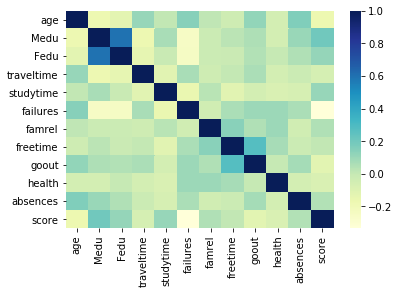

In [40]:
ax = sns.heatmap(stud_math[x_cols].corr(), cmap="YlGnBu")

In [ ]:
# Fedu удаляем из выборки как сильнокоррелирующий столбец
stud_math.drop(['Fedu'], axis='columns', inplace=True)


In [26]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


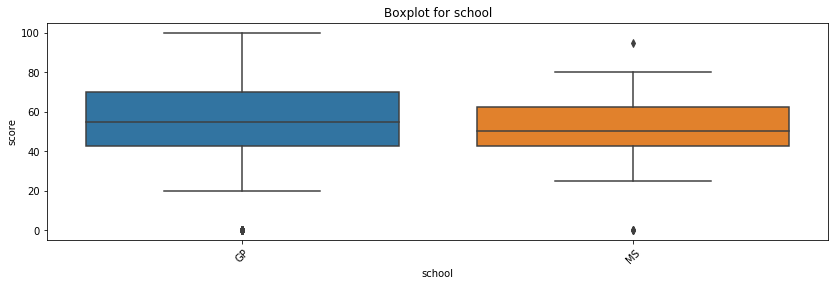

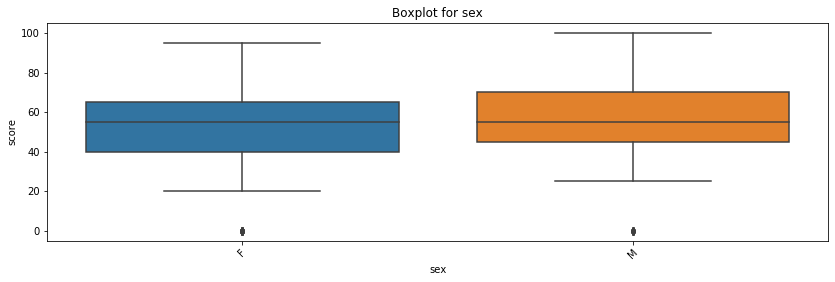

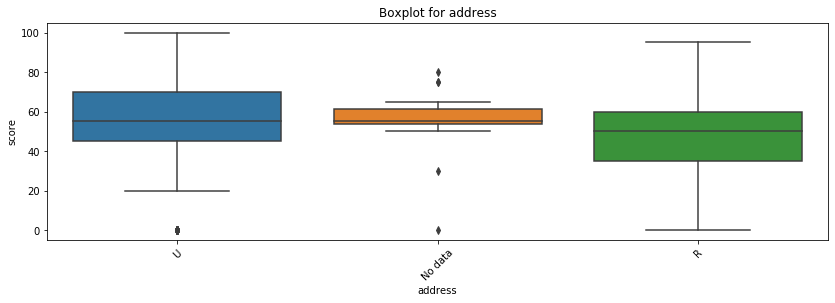

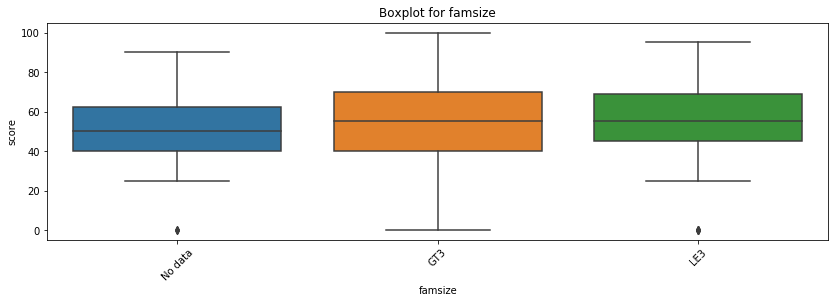

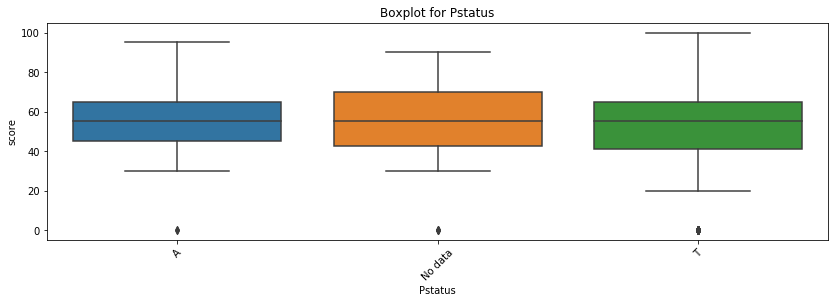

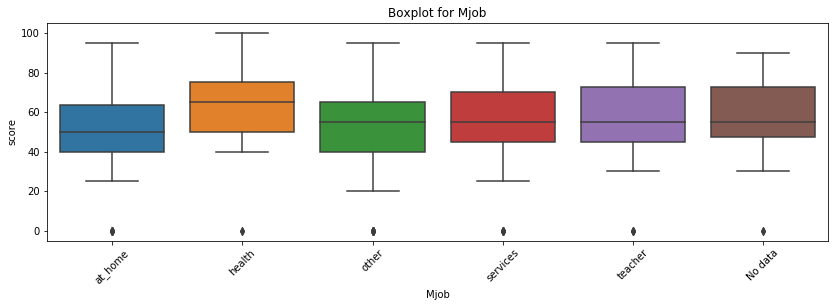

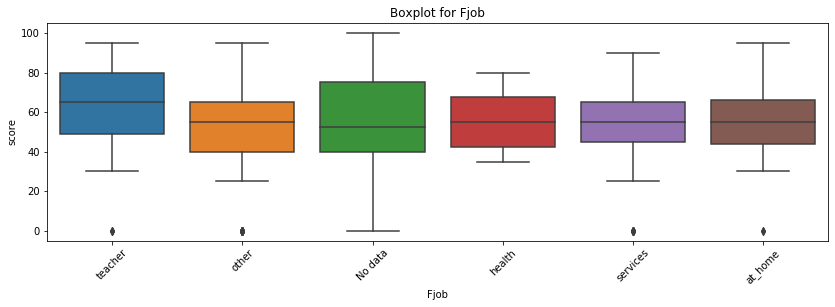

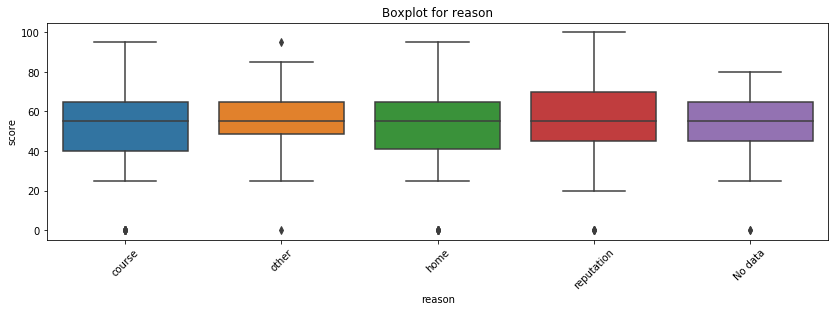

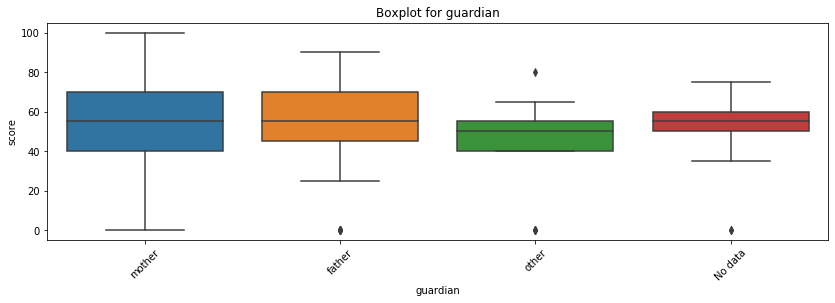

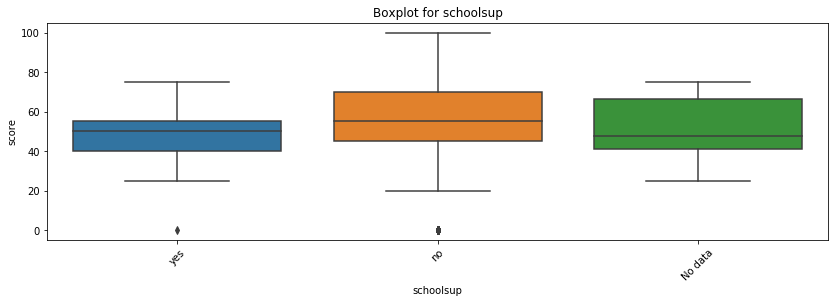

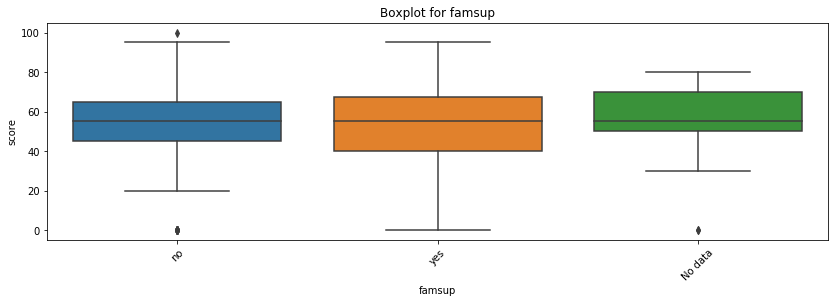

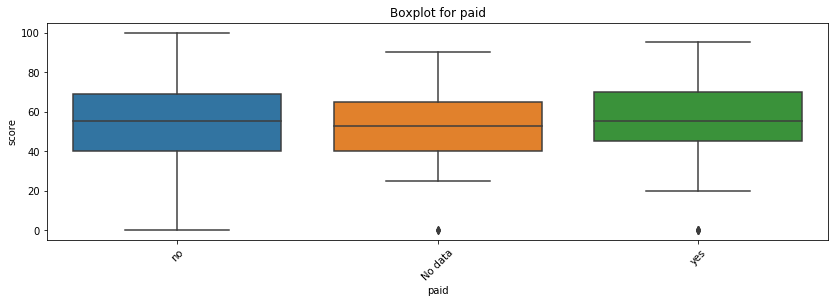

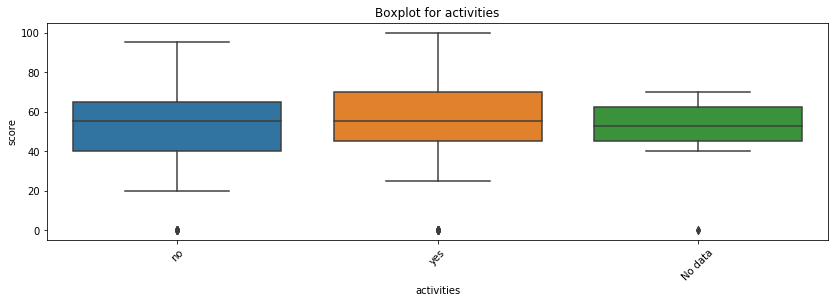

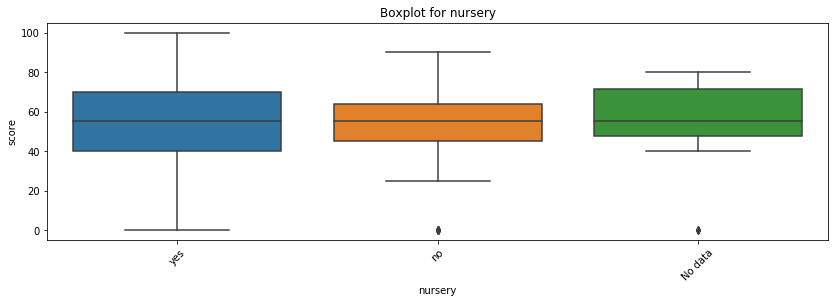

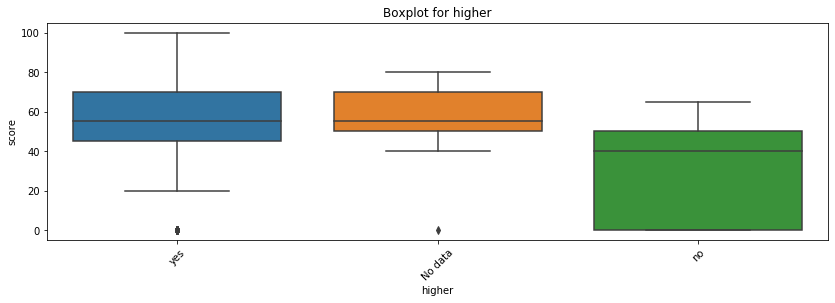

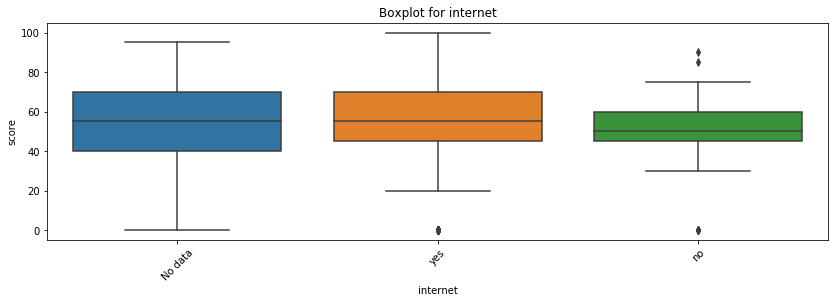

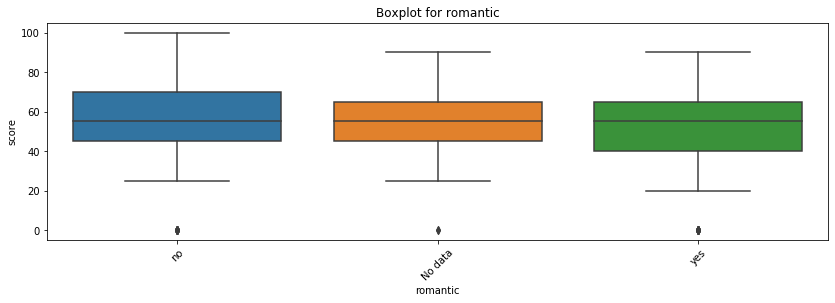

In [27]:
# пройдем по номинативным переменным
for col in object_col:
    get_boxplot(col)

In [31]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [32]:
for col in object_col:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [41]:
stud_math_for_model = stud_math.loc[:, ['school', 
                                        'sex', 
                                        'higher', 
                                        'romantic', 
                                        'age', 
                                        'Medu', 
                                        'traveltime', 
                                        'studytime', 
                                        'failures', 
                                        'famrel', 
                                        'freetime', 
                                        'goout', 
                                        'health', 
                                        'absences', 
                                        'score']]
stud_math_for_model.head(10)

,school,sex,higher,romantic,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
0,GP,F,yes,no,18,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,yes,no,17,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,yes,No data,15,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,yes,yes,15,4.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,yes,no,16,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,yes,no,16,4.0,1.0,2.0,0.0,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,yes,no,16,2.0,1.0,2.0,0.0,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,yes,no,17,4.0,2.0,2.0,0.0,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,yes,no,15,3.0,1.0,2.0,0.0,4.0,2.0,2.0,1.0,0.0,95.0
9,GP,M,yes,no,15,3.0,1.0,2.0,0.0,5.0,5.0,1.0,5.0,0.0,75.0


# Выводы

In [ ]:
1. Данные содержат большое количество пропусков (порядка трети записей заполненны полностью)
2. Выбросы почти отсутствуют, что говорит о аккуратном заполнении данных
3. Убедились, что внеучебные неудачи плохо отражаются на общей успеваемости
4. 

В итоге в модель попадают следующие параметры:
school
sex
higher
romantic
age
Medu
traveltime
studytime
failures
famrel
freetime
goout
health
absences
